### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read CSV

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

##### Check Data Types and Columns name

**from weather descr document**
- `M`: Missing Data, or data that are not normally reported for the station
- `-`: values not available for sunrise/sunset.
    - because each date has two reported data from station 1 and 2. Therefore, station 2 column of the date has no sunrise/sunset data.

In [3]:
print("Train set data types:\n")
print(train.dtypes)
print("-----")
print("Test set data types:\n")
print(test.dtypes)
print("-----")
print("Weather set data types:\n")
print(weather.dtypes)
print("-----")
print("Spray set data types:\n")
print(spray.dtypes)


Train set data types:

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
-----
Test set data types:

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object
-----
Weather set data types:

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            

In [4]:
# only select `object` columns
train_cats = train.select_dtypes(include=['object']).columns
test_cats = test.select_dtypes(include=['object']).columns
weather_cats = weather.select_dtypes(include=['object']).columns
spray_cats = spray.select_dtypes(include=['object']).columns

print(train_cats,'\n')
print(test_cats,'\n')
print(weather_cats,'\n')
print(spray_cats,'\n')

Index(['Date', 'Address', 'Species', 'Street', 'Trap',
       'AddressNumberAndStreet'],
      dtype='object') 

Index(['Date', 'Address', 'Species', 'Street', 'Trap',
       'AddressNumberAndStreet'],
      dtype='object') 

Index(['Date', 'Tavg', 'Depart', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'AvgSpeed'],
      dtype='object') 

Index(['Date', 'Time'], dtype='object') 



In [5]:
# courtesy of Brian Collins

def date_separate(df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    return df

# make all the dataset applied to the function
train=date_separate(train)
test=date_separate(test)
weather=date_separate(weather)
spray=date_separate(spray)

##### Check Train and Test set

In [6]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,29


In [7]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446,2009.576242,7.692557,15.341424
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936,2.354645,1.067675,8.901205
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,2007.000000,5.000000,1.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000,2007.000000,7.000000,7.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000,2009.000000,8.000000,15.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000,2011.000000,8.000000,24.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000,2013.000000,10.000000,31.000000


In [8]:
# Checking duplicates rows
# however it has different date, so we decide to keep
print(train.duplicated().value_counts())
train[train.duplicated()]

False    9693
True      813
dtype: int64


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,2007,6,26
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,2007,7,11
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007,7,11
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007,7,11
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0,2007,7,18
531,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,2007,7,18
548,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007,7,18
587,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007,7,19
588,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007,7,19
589,2007-07-19,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0,2007,7,19


In [9]:
test.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Year,Month,Day
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11


In [10]:
test.describe()

,Id,Block,Latitude,Longitude,AddressAccuracy,Year,Month,Day
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357,2010.702759,7.620244,16.187681
std,33571.041765,24.864726,0.106593,0.080699,1.252733,2.128750,1.065842,8.800007
min,1.000000,10.000000,41.644612,-87.930995,3.000000,2008.000000,6.000000,1.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000,2008.000000,7.000000,10.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000,2010.000000,8.000000,17.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000,2012.000000,8.000000,24.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000,2014.000000,10.000000,31.000000


In [11]:
print("# of unique train set species: ", train['Species'].nunique(), '\n')
train['Species'].value_counts()

# of unique train set species:  7 



CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [12]:
# Checking which species have the West Nile virus
train.groupby('WnvPresent')['Species'].value_counts()

WnvPresent  Species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: Species, dtype: int64

**Let's find some plotting**

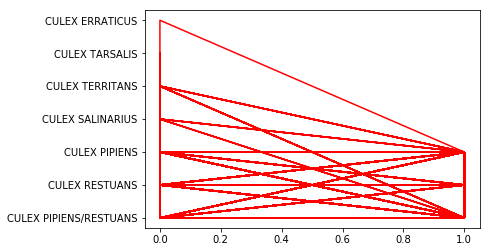

In [16]:
# trying to find some plotting here

# plt.plot(train['WnvPresent'], train['Species'], 'r')

In [13]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [14]:
print("# of unique test set species: ", test['Species'].nunique(), '\n')
test['Species'].value_counts()

# of unique test set species:  8 



CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
CULEX ERRATICUS           14345
UNSPECIFIED CULEX         14345
Name: Species, dtype: int64

In [15]:
print("# of unique train set traps: ", train['Trap'].nunique(), '\n')
train['Trap'].value_counts().head()

# of unique train set traps:  136 



T900    750
T115    542
T138    314
T002    185
T135    183
Name: Trap, dtype: int64

In [16]:
# We have 138 locations for the traps but we have 136 traps 
# which means there are 2 traps have been moved to new locations

In [17]:
train.groupby("Trap")["AddressNumberAndStreet"].nunique().value_counts()

1    134
2      2
Name: AddressNumberAndStreet, dtype: int64

In [18]:
train.groupby("Trap")["AddressNumberAndStreet"].nunique() == 2

Trap
T001    False
T002    False
T003    False
T004    False
T005    False
T006    False
T007    False
T008    False
T009     True
T011    False
T012    False
T013    False
T014    False
T015    False
T016    False
T017    False
T018    False
T019    False
T025    False
T027    False
T028    False
T030    False
T031    False
T033    False
T034    False
T035     True
T036    False
T037    False
T039    False
T040    False
        ...  
T160    False
T161    False
T162    False
T200    False
T206    False
T209    False
T212    False
T215    False
T218    False
T219    False
T220    False
T221    False
T222    False
T223    False
T224    False
T225    False
T226    False
T227    False
T228    False
T229    False
T230    False
T231    False
T232    False
T233    False
T235    False
T236    False
T237    False
T238    False
T900    False
T903    False
Name: AddressNumberAndStreet, Length: 136, dtype: bool

In [19]:
# T009 and T035 have been moved from thier locations

In [20]:
train[train["Trap"] == "T035"]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
389,2007-07-11,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,1,0,2007,7,11
513,2007-07-18,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,1,0,2007,7,18
561,2007-07-19,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,3,0,2007,7,19
759,2007-07-27,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,3,0,2007,7,27
760,2007-07-27,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,1,0,2007,7,27
1061,2007-08-01,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,6,0,2007,8,1
1062,2007-08-01,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,5,0,2007,8,1
1602,2007-08-07,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,4,0,2007,8,7
1603,2007-08-07,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,1,0,2007,8,7
1954,2007-08-15,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,30,S HOYNE AVE,T035,"3000 S HOYNE AVE, Chicago, IL",41.836644,-87.677737,8,9,0,2007,8,15


In [21]:
train[train["Trap"]== "T009"]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day
50,2007-06-05,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,2,0,2007,6,5
221,2007-07-02,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,2,0,2007,7,2
312,2007-07-11,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,1,0,2007,7,11
313,2007-07-11,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,14,0,2007,7,11
714,2007-07-27,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,1,0,2007,7,27
715,2007-07-27,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,1,0,2007,7,27
716,2007-07-27,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX PIPIENS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,1,0,2007,7,27
862,2007-08-01,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,2,0,2007,8,1
863,2007-08-01,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,6,0,2007,8,1
864,2007-08-01,"9100 West Higgins Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,91,W HIGGINS AVE,T009,"9100 W HIGGINS AVE, Chicago, IL",41.981964,-87.812827,8,2,0,2007,8,1


In [22]:
print("# of unique test set traps: ", test['Trap'].nunique(), '\n')
test['Trap'].value_counts().head()

# of unique test set traps:  149 



T009    1528
T035    1520
T900    1468
T002     857
T008     822
Name: Trap, dtype: int64

In [23]:
# Drop address Columns

train = train.drop(['Address','AddressNumberAndStreet', "Block", "Street", "AddressAccuracy"], axis=1)
test = test.drop(['Id', 'Address','AddressNumberAndStreet', "Block", "Street", "AddressAccuracy"], axis=1)

##### Weather Dataset

In [24]:
weather.head(5).T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [25]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir,Year,Month,Day
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905,2010.500000,7.500000,15.836957
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609,2.291677,1.710236,8.855731
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000,2007.000000,5.000000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000,2008.750000,6.000000,8.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000,2010.500000,7.500000,16.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000,2012.250000,9.000000,23.250000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000,2014.000000,10.000000,31.000000


In [26]:
weather['Station'].nunique()

2

##### Found some suspicious data
- 11 missing values in `weather['Tavg']` (should've `int`)
- 1472 values missing in `weather['Depart']`

In [27]:
(weather[weather.columns] == 'M').sum().sort_values(ascending=False)

Water1         2944
Depth          1472
Depart         1472
SnowFall       1472
Heat             11
Cool             11
Tavg             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
PrecipTotal       2
Tmin              0
Tmax              0
DewPoint          0
Date              0
Day               0
CodeSum           0
Sunrise           0
Sunset            0
Month             0
ResultSpeed       0
ResultDir         0
Year              0
Station           0
dtype: int64

In [28]:
weather[weather['Tavg'] == 'M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,M,0.00,29.36,30.04,10.1,7,10.4,2007,5,4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,M,0.28,29.16,29.80,7.4,24,8.3,2008,7,8
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,M,0.00,29.30,29.96,10.9,33,11.0,2008,10,1
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,M,0.14,29.23,29.86,3.8,10,8.2,2011,7,22
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,M,0.00,29.39,M,4.7,19,M,2012,8,22
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,M,0.00,29.51,30.17,15.8,2,16.1,2013,5,2
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,M,0.00,29.33,30.00,5.8,9,7.7,2013,9,24
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,M,0.22,29.36,30.01,6.3,36,7.8,2013,9,29
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,M,0.06,29.10,29.76,10.1,25,10.6,2013,10,6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,M,0.04,29.10,29.79,10.7,23,11.9,2014,5,2


In [29]:
weather['Depart'].value_counts().head()

M     1472
 2      93
-1      84
-2      80
 5      77
Name: Depart, dtype: int64

In [30]:
print(weather['WetBulb'].nunique())
weather['WetBulb'].value_counts().head()

48


63    135
65    131
59    129
61    123
64    121
Name: WetBulb, dtype: int64

In [31]:
print(weather['Heat'].nunique())
weather['Heat'].value_counts().head()

31


0    1870
4      88
1      86
2      81
8      67
Name: Heat, dtype: int64

In [32]:
print(weather['Cool'].nunique())
weather['Cool'].value_counts().head()

31


 0    1147
 8     138
 5     117
12     117
10     110
Name: Cool, dtype: int64

In [33]:
weather['Depth'].value_counts()

M    1472
0    1472
Name: Depth, dtype: int64

In [34]:
# Since all the data is missing. we can omit!
weather['Water1'].value_counts()

M    2944
Name: Water1, dtype: int64

In [35]:
# It also seems irrelavant. no meaningful values
weather['SnowFall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [36]:
# Given Water1 contains all missing values, and depth and snowfall also do not contain any useful information
# I'm going to go ahead and drop these columns 

In [37]:
weather= weather.drop(['Depth','SnowFall','Water1'], axis=1)

##### Can we extract "CodeSum"?

In [38]:
# can we break it by Regex?

weather['CodeSum'].value_counts()

                         1609
RA                        296
RA BR                     238
BR                        110
TSRA RA BR                 92
BR HZ                      81
RA DZ BR                   65
TSRA RA                    43
HZ                         39
RA BR HZ                   38
TSRA                       34
RA DZ                      22
TSRA BR                    21
TS TSRA RA BR              19
RA HZ                      16
TS RA                      13
TSRA RA BR HZ              12
TS TSRA BR                 10
TS                         10
DZ BR                      10
DZ BR HZ                    9
TSRA BR HZ                  8
TS RA BR                    8
DZ                          8
TS TSRA                     7
RA DZ BR HZ                 7
TS TSRA BR HZ               7
TS TSRA RA                  7
TS BR                       4
RA SN                       4
                         ... 
RA BR HZ VCFG               1
RA FG+ BR                   1
TS TSRA RA

In [39]:
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

##### Still the code is not working properly. (ask Ben)

In [40]:

# def pattern_breakers(target):
#     patterns = ['SH', 'DZ', 'RA', 'TS', 'BR']
#     [weather[i] == 1 for i in target if i in patterns]

# pattern_breakers(weather['CodeSum'])

In [41]:
# NEW one from Brian Collins
patterns = ['SH', 'DZ', 'RA', 'TS', 'BR']

# iterate through all the CodeSum to find the columns with the patterns list
weather['CodeSum'] = weather['CodeSum'].apply(lambda x: ' '.join([t for t in x.split(' ') 
                                                                   if t in patterns]))

weather.CodeSum.value_counts()

            1692
RA BR        406
RA           366
BR           245
RA DZ BR      81
TS RA BR      37
TS BR         23
RA DZ         23
TS RA         22
DZ BR         21
TS            20
DZ             8
Name: CodeSum, dtype: int64

In [42]:
# #courtesy of Brian Collins
# patterns = ['SH', 'DZ', 'RA', 'TS', 'BR']

# # iterate through all the CodeSum to find the columns with the patterns list
# weather['CodeSum'] = weather['CodeSum'].apply(lambda x: [t for t in x.split('0') 
#                                                                    if t in patterns])
# # converts everything from the lists that were created in the previous code into strings
# weather['CodeSum'] = weather['CodeSum'].apply(lambda x: 
#                                                 x if not isinstance(x, list) else x[0] if len(x) else '')

# weather.CodeSum.value_counts()

**Let us decide to drop "codeSum" column first** for the initial modeling. 


In [43]:
# weather.drop(columns=['CodeSum'], axis=1, inplace=True)

Let's keep take a look on other columns

In [44]:
# 318 values are just trace rainfall

weather.PrecipTotal=weather.PrecipTotal.str.strip()
weather[weather.PrecipTotal == 'T']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,T,29.31,30.05,10.4,8,10.8,2007,5,4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,T,29.40,30.10,11.7,7,12.0,2007,5,5
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,T,29.46,30.09,11.2,7,11.5,2007,5,5
12,1,2007-05-07,83,47,65,10,41,54,0,0,...,RA,T,29.38,30.12,8.6,18,10.5,2007,5,7
15,2,2007-05-08,80,60,70,M,57,63,0,5,...,,T,29.36,30.02,2.5,8,5.4,2007,5,8
47,2,2007-05-24,88,66,77,M,53,63,0,12,...,RA,T,29.47,30.10,13.8,20,15.2,2007,5,24
48,1,2007-05-25,70,56,63,1,44,53,2,0,...,,T,29.51,30.24,4.9,5,8.8,2007,5,25
54,1,2007-05-28,79,50,65,2,47,56,0,0,...,RA,T,29.43,30.15,4.8,10,5.3,2007,5,28
65,2,2007-06-02,81,68,75,M,62,67,0,10,...,RA BR,T,29.10,29.76,7.5,21,8.2,2007,6,2
73,2,2007-06-06,73,48,61,M,47,55,4,0,...,RA,T,29.13,29.82,9.6,15,10.6,2007,6,6


In [45]:
# 0.00 rainfall - 1,577 values
weather[weather.PrecipTotal == '0.00']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0.00,29.38,30.09,13.0,4,13.4,2007,5,2
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR,0.00,29.44,30.08,13.3,2,13.4,2007,5,2
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0.00,29.39,30.12,11.7,7,11.9,2007,5,3
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,,0.00,29.46,30.12,12.9,6,13.2,2007,5,3
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,0.00,29.36,30.04,10.1,7,10.4,2007,5,4
10,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0.00,29.57,30.29,14.4,11,15.0,2007,5,6
11,2,2007-05-06,68,52,60,M,30,46,5,0,...,,0.00,29.62,30.28,13.8,10,14.5,2007,5,6
13,2,2007-05-07,84,50,67,M,39,53,0,2,...,,0.00,29.44,30.12,8.5,17,9.9,2007,5,7


In [46]:
weather.groupby('Station')['Tmax'].mean()

Station
1    75.978940
2    76.353261
Name: Tmax, dtype: float64

##### Split station 1 and 2, join horizontally (courtesy of abhishek of kaggle)

In [47]:
weather_stn1 = weather[weather['Station'] == 1]
weather_stn2 = weather[weather['Station'] == 2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [48]:
(weather[weather.columns] == 'M').sum().sort_values(ascending=False)

Depart_y         1472
Cool_y             11
Heat_y             11
Tavg_y             11
SeaLevel_x          5
SeaLevel_y          4
WetBulb_x           3
AvgSpeed_y          3
StnPressure_y       2
PrecipTotal_y       2
StnPressure_x       2
WetBulb_y           1
Tavg_x              0
Cool_x              0
PrecipTotal_x       0
CodeSum_x           0
Sunset_x            0
Sunrise_x           0
Heat_x              0
Tmax_x              0
Tmin_x              0
ResultSpeed_x       0
DewPoint_x          0
Depart_x            0
Day_y               0
Day_x               0
ResultDir_x         0
AvgSpeed_x          0
Year_x              0
Month_x             0
Month_y             0
Tmax_y              0
Tmin_y              0
DewPoint_y          0
Sunrise_y           0
Sunset_y            0
CodeSum_y           0
ResultSpeed_y       0
ResultDir_y         0
Year_y              0
Date                0
dtype: int64

In [49]:
# replace missing values and T with -1 (courtesy of abhishek of kaggle)

weather = weather.replace("M", -1)
weather = weather.replace("-", -1)
weather = weather.replace("T", -1)
weather = weather.replace(" T", -1)
weather = weather.replace("  T", -1)

In [50]:
weather.describe()

,Tmax_x,Tmin_x,DewPoint_x,ResultSpeed_x,ResultDir_x,Year_x,Month_x,Day_x,Tmax_y,Tmin_y,Depart_y,DewPoint_y,Sunrise_y,Sunset_y,ResultSpeed_y,ResultDir_y,Year_y,Month_y,Day_y
count,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.0,1472.000000,1472.0,1472.0,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000
mean,75.97894,56.730978,53.377717,6.987092,17.656250,2010.500000,7.500000,15.836957,76.353261,58.889946,-1.0,53.538043,-1.0,-1.0,6.934239,17.33356,2010.500000,7.500000,15.836957
std,11.50315,10.347907,10.670263,3.586353,10.222077,2.292067,1.710526,8.857236,11.421482,10.306855,0.0,10.683121,0.0,0.0,3.589725,9.90345,2.292067,1.710526,8.857236
min,42.00000,29.000000,22.000000,0.100000,1.000000,2007.000000,5.000000,1.000000,41.000000,29.000000,-1.0,23.000000,-1.0,-1.0,0.300000,1.00000,2007.000000,5.000000,1.000000
25%,68.00000,49.000000,46.000000,4.400000,7.000000,2008.750000,6.000000,8.000000,69.000000,51.000000,-1.0,46.000000,-1.0,-1.0,4.275000,8.00000,2008.750000,6.000000,8.000000
50%,78.00000,58.000000,54.000000,6.400000,19.500000,2010.500000,7.500000,16.000000,78.000000,60.000000,-1.0,55.000000,-1.0,-1.0,6.500000,19.00000,2010.500000,7.500000,16.000000
75%,85.00000,65.000000,61.250000,9.100000,26.000000,2012.250000,9.000000,23.250000,85.000000,67.000000,-1.0,62.000000,-1.0,-1.0,9.225000,24.00000,2012.250000,9.000000,23.250000
max,103.00000,82.000000,75.000000,24.100000,36.000000,2014.000000,10.000000,31.000000,104.000000,83.000000,-1.0,74.000000,-1.0,-1.0,21.700000,36.00000,2014.000000,10.000000,31.000000


In [51]:
# drop the columns with all missing values
weather.drop(columns=['Depart_y', 'Sunrise_y', 'Sunset_y',
                      'Year_y', 'Month_y', 'Day_y'], axis=1, inplace=True)
weather.describe()

,Tmax_x,Tmin_x,DewPoint_x,ResultSpeed_x,ResultDir_x,Year_x,Month_x,Day_x,Tmax_y,Tmin_y,DewPoint_y,ResultSpeed_y,ResultDir_y
count,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.00000
mean,75.97894,56.730978,53.377717,6.987092,17.656250,2010.500000,7.500000,15.836957,76.353261,58.889946,53.538043,6.934239,17.33356
std,11.50315,10.347907,10.670263,3.586353,10.222077,2.292067,1.710526,8.857236,11.421482,10.306855,10.683121,3.589725,9.90345
min,42.00000,29.000000,22.000000,0.100000,1.000000,2007.000000,5.000000,1.000000,41.000000,29.000000,23.000000,0.300000,1.00000
25%,68.00000,49.000000,46.000000,4.400000,7.000000,2008.750000,6.000000,8.000000,69.000000,51.000000,46.000000,4.275000,8.00000
50%,78.00000,58.000000,54.000000,6.400000,19.500000,2010.500000,7.500000,16.000000,78.000000,60.000000,55.000000,6.500000,19.00000
75%,85.00000,65.000000,61.250000,9.100000,26.000000,2012.250000,9.000000,23.250000,85.000000,67.000000,62.000000,9.225000,24.00000
max,103.00000,82.000000,75.000000,24.100000,36.000000,2014.000000,10.000000,31.000000,104.000000,83.000000,74.000000,21.700000,36.00000


In [52]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 35 columns):
Date             1472 non-null object
Tmax_x           1472 non-null int64
Tmin_x           1472 non-null int64
Tavg_x           1472 non-null object
Depart_x         1472 non-null object
DewPoint_x       1472 non-null int64
WetBulb_x        1472 non-null object
Heat_x           1472 non-null object
Cool_x           1472 non-null object
Sunrise_x        1472 non-null object
Sunset_x         1472 non-null object
CodeSum_x        1472 non-null object
PrecipTotal_x    1472 non-null object
StnPressure_x    1472 non-null object
SeaLevel_x       1472 non-null object
ResultSpeed_x    1472 non-null float64
ResultDir_x      1472 non-null int64
AvgSpeed_x       1472 non-null object
Year_x           1472 non-null int64
Month_x          1472 non-null int64
Day_x            1472 non-null int64
Tmax_y           1472 non-null int64
Tmin_y           1472 non-null int64
Tavg_y           1472 non-n

In [53]:
# seems very redundant code line, anyone can make it simpler way by creating function?

weather['Tavg_x']= weather.Tavg_x.astype(int)
weather['Tavg_y']= weather.Tavg_y.astype(int)
weather['AvgSpeed_x']=weather.AvgSpeed_x.astype(float)
weather['AvgSpeed_y']=weather.AvgSpeed_y.astype(float)
weather['Heat_x']=weather.Heat_x.astype(int)
weather['Heat_y']=weather.Heat_y.astype(int)
weather['Cool_x']=weather.Cool_x.astype(int)
weather['Cool_y']=weather.Cool_y.astype(int)
weather['PrecipTotal_x']=weather.PrecipTotal_x.astype(float)
weather['PrecipTotal_y']=weather.PrecipTotal_y.astype(float)
weather['StnPressure_x']=weather.StnPressure_x.astype(float)
weather['StnPressure_y']=weather.StnPressure_y.astype(float)
weather['StnPressure_x']=weather.StnPressure_x.astype(float)
weather['StnPressure_y']=weather.StnPressure_y.astype(float)
weather['SeaLevel_x']=weather.SeaLevel_x.astype(float)
weather['SeaLevel_y']=weather.SeaLevel_y.astype(float)

##### Spray dataset

In [54]:
spray.head().T

,0,1,2,3,4
Date,2011-08-29,2011-08-29,2011-08-29,2011-08-29,2011-08-29
Time,6:56:58 PM,6:57:08 PM,6:57:18 PM,6:57:28 PM,6:57:38 PM
Latitude,42.3916,42.3913,42.391,42.3906,42.3904
Longitude,-88.0892,-88.0892,-88.0892,-88.0892,-88.0889
Year,2011,2011,2011,2011,2011
Month,8,8,8,8,8
Day,29,29,29,29,29


In [55]:
spray.describe()

,Latitude,Longitude,Year,Month,Day
count,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000
mean,41.904828,-87.736690,2012.702191,7.948028,17.073812
std,0.104381,0.067292,0.712013,0.677402,7.959018
min,41.713925,-88.096468,2011.000000,7.000000,5.000000
25%,41.785001,-87.794225,2013.000000,7.000000,8.000000
50%,41.940075,-87.727853,2013.000000,8.000000,17.000000
75%,41.980978,-87.694108,2013.000000,8.000000,25.000000
max,42.395983,-87.586727,2013.000000,9.000000,29.000000


##### Drop? / Duplicate
- Spray Time duplication - "7:44:32 PM", 541 counts
- Spray Time NaN values, 584 counts

In [56]:
# weird. How 7:44:32 pm has 541 values? are they using auto-spray function?

spray.Time.value_counts().head()

7:44:32 PM    541
9:05:56 PM      5
8:58:56 PM      5
9:35:47 PM      5
9:40:27 PM      5
Name: Time, dtype: int64

In [57]:
# it seems the duplicated data. However do we need to drop it? 
spray[spray.Time == "7:44:32 PM"].head()

,Date,Time,Latitude,Longitude,Year,Month,Day
489,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,7
490,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,7
491,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,7
492,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,7
493,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,7


In [58]:
spray[spray['Time'].isnull()]

,Date,Time,Latitude,Longitude,Year,Month,Day
1030,2011-09-07,NaN,41.987092,-87.794286,2011,9,7
1031,2011-09-07,NaN,41.987620,-87.794382,2011,9,7
1032,2011-09-07,NaN,41.988004,-87.794574,2011,9,7
1033,2011-09-07,NaN,41.988292,-87.795486,2011,9,7
1034,2011-09-07,NaN,41.988100,-87.796014,2011,9,7
1035,2011-09-07,NaN,41.986372,-87.794862,2011,9,7
1036,2011-09-07,NaN,41.986228,-87.795582,2011,9,7
1037,2011-09-07,NaN,41.984836,-87.793998,2011,9,7
1038,2011-09-07,NaN,41.984836,-87.794670,2011,9,7
1039,2011-09-07,NaN,41.984884,-87.795198,2011,9,7


In [59]:
spray[spray.Longitude == -87.794225]['Time'].value_counts()

7:44:32 PM    541
Name: Time, dtype: int64

**Merge with weather Data**

In [60]:
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

In [61]:
train.head()

,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day,Tmax_x,...,WetBulb_y,Heat_y,Cool_y,CodeSum_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007,5,29,88,...,66,0,12,BR,0.0,29.44,30.09,5.8,16,7.4
1,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007,5,29,88,...,66,0,12,BR,0.0,29.44,30.09,5.8,16,7.4
2,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007,5,29,88,...,66,0,12,BR,0.0,29.44,30.09,5.8,16,7.4
3,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007,5,29,88,...,66,0,12,BR,0.0,29.44,30.09,5.8,16,7.4
4,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007,5,29,88,...,66,0,12,BR,0.0,29.44,30.09,5.8,16,7.4


In [62]:
train.columns

Index(['Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Year', 'Month', 'Day', 'Tmax_x', 'Tmin_x', 'Tavg_x',
       'Depart_x', 'DewPoint_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'Sunrise_x',
       'Sunset_x', 'CodeSum_x', 'PrecipTotal_x', 'StnPressure_x', 'SeaLevel_x',
       'ResultSpeed_x', 'ResultDir_x', 'AvgSpeed_x', 'Year_x', 'Month_x',
       'Day_x', 'Tmax_y', 'Tmin_y', 'Tavg_y', 'DewPoint_y', 'WetBulb_y',
       'Heat_y', 'Cool_y', 'CodeSum_y', 'PrecipTotal_y', 'StnPressure_y',
       'SeaLevel_y', 'ResultSpeed_y', 'ResultDir_y', 'AvgSpeed_y'],
      dtype='object')

In [63]:
train.groupby("Year")['Species'].value_counts()

Year  Species               
2007  CULEX PIPIENS             1603
      CULEX PIPIENS/RESTUANS    1553
      CULEX RESTUANS             505
      CULEX TERRITANS            109
      CULEX SALINARIUS            41
2009  CULEX PIPIENS/RESTUANS    1123
      CULEX RESTUANS             716
      CULEX PIPIENS              371
      CULEX TERRITANS             19
      CULEX SALINARIUS            18
      CULEX TARSALIS               2
2011  CULEX PIPIENS/RESTUANS     962
      CULEX RESTUANS             717
      CULEX PIPIENS              261
      CULEX TERRITANS             86
      CULEX SALINARIUS            24
      CULEX TARSALIS               4
2013  CULEX PIPIENS/RESTUANS    1114
      CULEX RESTUANS             802
      CULEX PIPIENS              464
      CULEX TERRITANS              8
      CULEX SALINARIUS             3
      CULEX ERRATICUS              1
Name: Species, dtype: int64

Let's make it binary columns for the type of mosquitos

In [64]:
#courtesy of Brian Collins

def bug_find(df):
    for bug in df:
        if bug == 'CULEX PIPIENS/RESTUANS':
            return 'wnv_bug'
        elif bug == 'CULEX PIPIENS':
            return 'wnv_bug'
        elif bug == 'CULEX RESTUANS':
            return 'wnv_bug'
        elif bug == 'UNSPECIFIED CULEX':
            return 'wnv_bug'
        else:
            return 'no_wnv_bug'

train['Species'] = train[['Species']].apply(bug_find, axis=1)
test['Species'] = test[['Species']].apply(bug_find, axis=1)
print(train['Species'].value_counts())
print(test['Species'].value_counts())

wnv_bug       10191
no_wnv_bug      315
Name: Species, dtype: int64
wnv_bug       58895
no_wnv_bug    57398
Name: Species, dtype: int64


In [65]:
test['Species'].value_counts()

wnv_bug       58895
no_wnv_bug    57398
Name: Species, dtype: int64

##### Check numerical columns data, find abnormalty or outliers

In [66]:
print(train.isnull().sum().sum())
print(weather.isnull().sum().sum())
print(spray.isnull().sum().sum())


0
0
584


In [67]:
# import all relevant packages

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

%matplotlib inline

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ModuleNotFoundError: No module named 'keras'

In [ ]:
pandas_profiling.ProfileReport(train)

In [84]:
import matplotlib.pyplot as plt

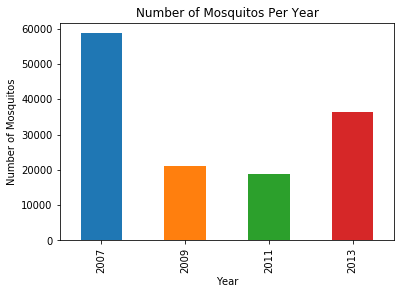

In [90]:
train.groupby('Year')['NumMosquitos'].sum().plot(kind='bar')
plt.ylabel('Number of Mosquitos')
plt.title('Number of Mosquitos Per Year');

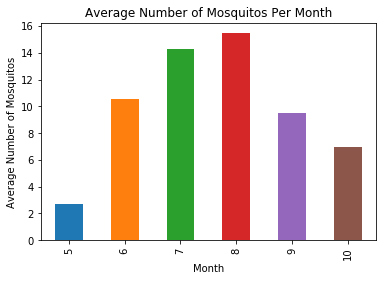

In [101]:
train.groupby('Month')['NumMosquitos'].mean().plot(kind='bar')
plt.ylabel('Average Number of Mosquitos')
plt.title('Average Number of Mosquitos Per Month');

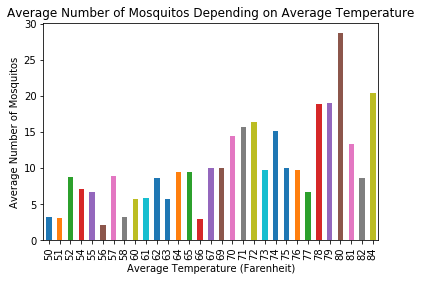

In [100]:
train.groupby('Tavg_x')['NumMosquitos'].mean().plot(kind='bar')
plt.ylabel('Average Number of Mosquitos')
plt.xlabel('Average Temperature (Farenheit)')
plt.title('Average Number of Mosquitos Depending on Average Temperature');